# Imports

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Dataset

In [6]:
# carregando os dados
df = pd.read_csv('../datasets/WorldsBestRestaurants.csv')

# testando os dados (primeiras linhas)
# print(df.head())

# Limpeza dos Dados

In [13]:
# verificar dados ausentes
df.isnull().sum()

year          0
rank          0
restaurant    0
location      0
country       0
lat           0
lng           0
dtype: int64

In [14]:
# tratar dados ausentes
df.dropna(inplace=True)

# Análise Exploratória de Dados (EDA)

In [15]:
df.describe()

,year,rank,lat,lng
count,1050.000000,1050.000000,1050.000000,1050.000000
mean,2012.142857,25.490476,35.231239,0.070343
std,6.276788,14.432130,24.690886,61.607445
min,2002.000000,1.000000,-38.336369,-122.870051
25%,2007.000000,13.000000,35.824923,-3.737738
50%,2012.000000,25.000000,43.318237,2.351377
75%,2017.000000,38.000000,48.857548,12.568337
max,2023.000000,50.000000,63.843390,151.209295


In [42]:
# visualização de distribuição
# sns.histplot(df['rank'])
# plt.show()

# Visualização dos Dados

In [45]:
# visualizar todo o dataset
df

,year,rank,restaurant,location,country,lat,lng
0,2002,1,El Bulli,Roses,Spain,42.263949,3.179553
1,2002,2,Restaurant Gordon Ramsay,London,United Kingdom,51.507218,-0.127586
2,2002,3,The French Laundry,Yountville,United States,38.401578,-122.360810
3,2002,4,Rockpool,Sydney,Australia,-33.868820,151.209295
4,2002,5,Spoon des Iles,Ile Maurice,Mauritius,-20.348404,57.552152
...,...,...,...,...,...,...,...
1045,2023,46,Orfali Bros Bistro,Dubai,United Arab Emirates,25.204849,55.270783
1046,2023,47,Mayta,Lima,Peru,-12.046689,-77.043088
1047,2023,48,La Grenouillère,La Madelaine-sous-Montreuil,France,50.466809,1.748056
1048,2023,49,Rosetta,Mexico City,Mexico,19.432608,-99.133208


In [69]:
# VISUALIZAÇÃO RANK 1 DE TODOS OS ANOS

# criando variavel top 1 por ano
top1_per_year = df.loc[df.groupby('year')['rank'].idxmin()]

# ordenar pelos anos
top1_per_year = top1_per_year.sort_values(by='year', ascending=True)

# Visualizar o resultado
top1_per_year

,year,rank,restaurant,location,country,lat,lng
0,2002,1,El Bulli,Roses,Spain,42.263949,3.179553
50,2003,1,The French Laundry,Yountville,United States,38.401578,-122.360810
100,2004,1,The French Laundry,Yountville,United States,38.401578,-122.360810
150,2005,1,The Fat Duck,Maidenhead,United Kingdom,51.522560,-0.724308
200,2006,1,El Bulli,Roses,Spain,42.263949,3.179553
250,2007,1,El Bulli,Roses,Spain,42.263949,3.179553
300,2008,1,El Bulli,Roses,Spain,42.263949,3.179553
350,2009,1,El Bulli,Roses,Spain,42.263949,3.179553
400,2010,1,Noma,Copenhagen,Denmark,55.676097,12.568337
450,2011,1,Noma,Copenhagen,Denmark,55.676097,12.568337


In [56]:
# baixar arquivo para excel
# top1_per_year.to_excel('top1_per_year.xlsx', index=False)

In [73]:
# VISUALIZAÇÃO DOS RESTAURANTES QUE FORAM MAIS VEZES TOP 1 AO LONGO DOS ANOS

# filtra o dataframe para incluir apenas restaurante top 1
# conta quantas vezes o restaurante foi top 1
top1_counts = df[df['rank'] == 1]['restaurant'].value_counts().reset_index()

# colunas para melhor visualização
top1_counts.columns = ['restaurant', 'count']


top1_counts

,restaurant,count
0,El Bulli,5
1,Noma,5
2,The French Laundry,2
3,El Celler de Can Roca,2
4,Osteria Francescana,2
5,The Fat Duck,1
6,Eleven Madison Park,1
7,Mirazur,1
8,Geranium,1
9,Central,1


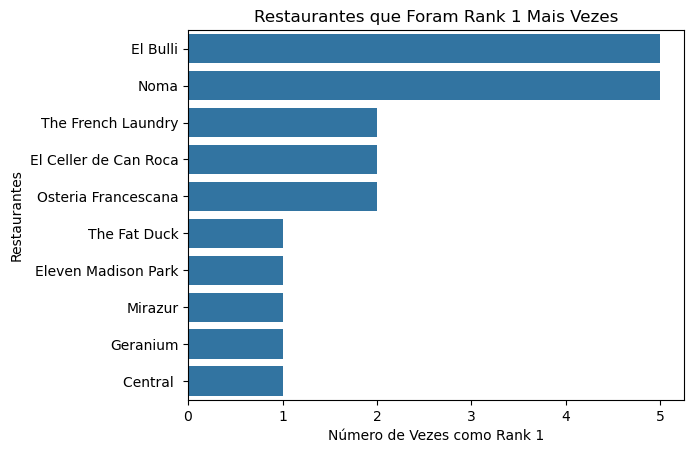

In [79]:
# gráfico de barras para mostrar quais restaurantes foram top 1 mais vezes
sns.barplot(x='count', y='restaurant', data=top1_counts)
plt.xlabel('Número de Vezes como Rank 1')
plt.ylabel('Restaurantes')
plt.title('Restaurantes que Foram Rank 1 Mais Vezes')
plt.show()

# Insights

## Evolução dos Restaurantes no Top 1
Observando os dados de 2002 a 2023, notamos que certos restaurantes conseguem manter a excelência por anos consecutivos, enquanto outros são mais voláteis no ranking.

## Tendências Geográficas
Analisando a localização dos restaurantes que ficaram no top 1, percebe-se uma concentração em determinadas regiões ou países em certos períodos. Por exemplo, um aumento de restaurantes asiáticos nos últimos anos.

## Preferências Culinárias
A popularidade de certos tipos de culinária, como a molecular gastronomy, que teve seu auge em determinada década, pode ser observada.

## Destaques
Restaurantes que conseguiram voltar ao topo após vários anos, indicando um possível rejuvenescimento da sua proposta culinária.

# Conclusão

## Próximos Passos
A análise mostra uma dinâmica interessante no mundo dos melhores restaurantes, com alguns mantendo uma posição dominante e outros subindo e descendo no ranking.

Investigar mais a fundo as características específicas que levam um restaurante ao topo e explorar a correlação entre tendências globais e mudanças no ranking.